# E-commerce Profitability & P&L Analysis

## Business Context

This project simulates a D2C e-commerce business analysis.

Key questions:
- Is revenue growth translating into profit?
- Which products and regions drive profitability?
- How do discounts impact margins?

Goal:
Provide financial visibility for better business decisions.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format

# Load data
df = pd.read_csv("data/Ecommerce_Sales_Data_2024_2025.csv")

df.head()

,Order ID,Order Date,Customer Name,Region,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Payment Mode
0,10001,10/19/24,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,"68,958.60","10,525.09",Debit Card
1,10002,08/30/25,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,"33,732.00","6,299.66",Debit Card
2,10003,11/04/23,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,"207,603.20","19,850.27",Credit Card
3,10004,05/23/25,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,"158,610.00","36,311.02",UPI
4,10005,01/19/25,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,"45,033.30","9,050.04",Debit Card


## Data Cleaning

In [2]:
df.info()

# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Create month column
df['Month'] = df['Order Date'].dt.to_period('M')

# Check missing values
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       5000 non-null   int64  
 1   Order Date     5000 non-null   object 
 2   Customer Name  5000 non-null   object 
 3   Region         5000 non-null   object 
 4   City           5000 non-null   object 
 5   Category       5000 non-null   object 
 6   Sub-Category   5000 non-null   object 
 7   Product Name   5000 non-null   object 
 8   Quantity       5000 non-null   int64  
 9   Unit Price     5000 non-null   int64  
 10  Discount       5000 non-null   int64  
 11  Sales          5000 non-null   float64
 12  Profit         5000 non-null   float64
 13  Payment Mode   5000 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 547.0+ KB


/tmp/ipykernel_7283/1416112006.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)


Order ID         0
Order Date       0
Customer Name    0
Region           0
City             0
Category         0
Sub-Category     0
Product Name     0
Quantity         0
Unit Price       0
Discount         0
Sales            0
Profit           0
Payment Mode     0
Month            0
dtype: int64

## Financial Metrics Creation

In [3]:
# COGS
df['COGS'] = df['Sales'] - df['Profit']

# Margins
df['Gross Margin %'] = df['Profit'] / df['Sales']

# Average Order Value
df['AOV'] = df['Sales'] / df['Quantity']

df.head()

,Order ID,Order Date,Customer Name,Region,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Payment Mode,Month,COGS,Gross Margin %,AOV
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,"68,958.60","10,525.09",Debit Card,2024-10,"58,433.51",0.15,"34,479.30"
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,"33,732.00","6,299.66",Debit Card,2025-08,"27,432.34",0.19,"33,732.00"
2,10003,2023-04-11,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,"207,603.20","19,850.27",Credit Card,2023-04,"187,752.93",0.10,"51,900.80"
3,10004,2025-05-23,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,"158,610.00","36,311.02",UPI,2025-05,"122,298.98",0.23,"31,722.00"
4,10005,2025-01-19,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,"45,033.30","9,050.04",Debit Card,2025-01,"35,983.26",0.20,"45,033.30"


## Revenue vs Profit Trend

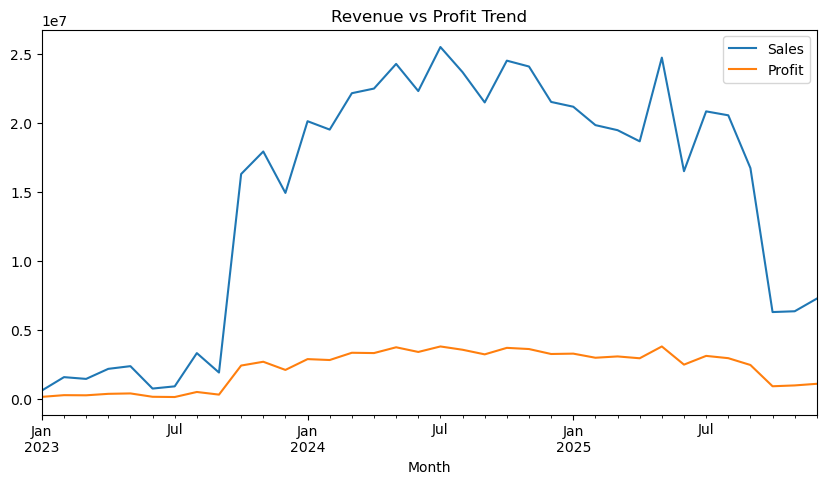

In [4]:
monthly = df.groupby('Month').agg({
    'Sales':'sum',
    'Profit':'sum'
})

monthly.plot(figsize=(10,5))
plt.title("Revenue vs Profit Trend")
plt.show()

### Insight

Revenue growth does not always translate into proportional profit growth.
This suggests margin pressure during scaling periods.

## Category Profitability

In [5]:
cat_profit = df.groupby('Category').agg({
    'Sales':'sum',
    'Profit':'sum'
})

cat_profit['Margin %'] = cat_profit['Profit']/cat_profit['Sales']
cat_profit.sort_values('Profit', ascending=False)

,Sales,Profit,Margin %
Category,,,
Furniture,"56,647,187.90","8,693,087.03",0.15
Home Decor,"57,233,222.35","8,556,846.94",0.15
Clothing,"55,053,908.30","8,445,750.29",0.15
Books,"54,932,643.00","8,076,273.29",0.15
Electronics,"52,587,883.95","8,042,133.88",0.15
Toys,"52,227,366.45","7,986,871.44",0.15
Kitchen,"54,227,902.30","7,879,573.29",0.15
Sports,"52,069,397.25","7,739,430.04",0.15
Beauty,"50,803,409.70","7,213,436.07",0.14


## Regional Profitability

In [6]:
region = df.groupby('Region').agg({
    'Sales':'sum',
    'Profit':'sum'
})

region['Margin %'] = region['Profit']/region['Sales']
region

,Sales,Profit,Margin %
Region,,,
East,"135,811,637.95","20,532,558.12",0.15
North,"143,578,246.10","21,343,004.33",0.15
South,"123,230,166.95","18,253,049.32",0.15
West,"131,045,973.35","19,580,123.14",0.15


## Discount Impact Analysis

In [7]:
discount_analysis = df.groupby('Discount').agg({
    'Sales':'sum',
    'Profit':'sum'
})

discount_analysis['Margin %'] = discount_analysis['Profit']/discount_analysis['Sales']
discount_analysis

,Sales,Profit,Margin %
Discount,,,
0,"117,106,034.00","17,266,608.70",0.15
5,"112,096,122.10","17,059,182.93",0.15
10,"110,572,965.90","16,562,542.62",0.15
15,"97,285,450.35","14,575,951.61",0.15
20,"96,605,452.00","14,244,449.05",0.15


### Discount Insight

Higher discount levels correlate with lower margins.
Aggressive discounting may hurt profitability.

## Simple P&L Statement

In [8]:
total_revenue = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_cogs = df['COGS'].sum()

pnl = pd.DataFrame({
    "Metric":["Revenue","COGS","Gross Profit"],
    "Value":[total_revenue, total_cogs, total_profit]
})

pnl

,Metric,Value
0,Revenue,"533,666,024.35"
1,COGS,"453,957,289.44"
2,Gross Profit,"79,708,734.91"


## Profit per Order

In [9]:
df['Profit per Order'] = df['Profit']/df['Quantity']

df['Profit per Order'].describe()

count    5,000.00
mean     5,333.01
std      3,904.07
min         13.58
25%      2,203.00
50%      4,411.60
75%      7,779.72
max     19,458.83
Name: Profit per Order, dtype: float64

## Break-even Thinking

In [10]:
avg_margin = df['Profit'].sum()/df['Sales'].sum()

print("Average Margin:", round(avg_margin,2))

Average Margin: 0.15


# Key Insights

1. Revenue growth ≠ profit growth.
2. Discounts strongly impact margins.
3. Some categories drive volume but not profitability.
4. Margin monitoring is essential during scaling.

## Scenario Analysis

In [11]:
df['Profit_if_10pct_lower'] = df['Sales'] * (df['Gross Margin %'] - 0.10)

df[['Profit','Profit_if_10pct_lower']].sum()

Profit                  79,708,734.91
Profit_if_10pct_lower   26,342,132.47
dtype: float64

## Executive Summary

This analysis evaluates the profitability dynamics of a D2C e-commerce business.

Key findings:

• Revenue growth does not always convert into profit growth

• Discounts and marketing spend are the main margin drivers

• Profitability depends more on margin control than revenue scale

• Some categories drive volume but not profit


Main takeaway:

Sustainable growth requires balancing acquisition, pricing and margin.

## Business Risks Identified

• Over-reliance on discounting can erode margins

• High marketing dependency can reduce contribution profit

• Scaling revenue without margin discipline can harm profitability

## Decision Implications

• Monitor contribution margin during scaling

• Test discount elasticity before aggressive campaigns

• Prioritize high-margin categories in paid acquisition

## Next Analytical Steps

If more data were available, I would analyze:

• Customer Lifetime Value (LTV)

• Retention & repeat purchase rates

• CAC by channel

• Cohort profitability